In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pkdarabi/medical-image-dataset-brain-tumor-detection")

print("Path to dataset files:", path)

100%|██████████| 297M/297M [00:01<00:00, 172MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/5


In [3]:
import os

# Path to the dataset directory
dataset_path = '/root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/5'

# List all files in the dataset folder
dataset_files = os.listdir(dataset_path)
dataset_files


['BrainTumor']

In [5]:
# Path to the 'BrainTumor' directory
brain_tumor_folder = os.path.join(dataset_path, 'BrainTumor')

# List all files in the 'BrainTumor' folder
brain_tumor_files = os.listdir(brain_tumor_folder)
brain_tumor_files


['BrainTumorYolov9', 'BrainTumorYolov8', 'BrainTumorYolov11']

In [6]:
# Path to one of the YOLO directories (e.g., Yolov9)
yolo_folder = os.path.join(brain_tumor_folder, 'BrainTumorYolov9')

# List all files in the YOLO directory
yolo_files = os.listdir(yolo_folder)
yolo_files


['valid', 'test', 'data.yaml', 'train']

In [7]:
# Path to the 'train' directory
train_folder = os.path.join(yolo_folder, 'train')

# List all files in the 'train' folder
train_files = os.listdir(train_folder)
train_files


['images', 'labels']

In [8]:
# Paths to the 'images' and 'labels' directories
images_folder = os.path.join(train_folder, 'images')
labels_folder = os.path.join(train_folder, 'labels')

# List files in the 'images' and 'labels' directories
image_files = os.listdir(images_folder)
label_files = os.listdir(labels_folder)

# Display the first few files to inspect the structure
image_files[:5], label_files[:5]


(['2121_jpg.rf.5623d0e230fb8edd6462702f34d587e9.jpg',
  '2345_jpg.rf.d797596b9aaa3c9df26b25bb83f766b4.jpg',
  '2559_jpg.rf.81f56f09d62336edb7b622260924a8f6.jpg',
  '2300_jpg.rf.ba2d4a22763f46ce7dd417e4a47656b5.jpg',
  '1898_jpg.rf.c34e6b172c200d40187e0a197adda8ad.jpg'],
 ['936_jpg.rf.86c290fceb65493e9270f62eab5770d8.txt',
  '1383_jpg.rf.5ec119d5ef9cad26238074879ad6dc8a.txt',
  '475_jpg.rf.e29d5f4b2fd520013c31291ca469318a.txt',
  '572_jpg.rf.0afd7a5af7fde5704ffc09fe4feffb54.txt',
  '491_jpg.rf.a8995f85b7f491d41af6e55fde3db8fa.txt'])

In [10]:
# Print the contents of the label file to inspect its format
with open(label_path, 'r') as file:
    label_data = file.readlines()

# Print the first label line to check the format
label_data[:5]


['2 0.3091922 0.4206128140625 0.28969359375 0.4679665734375 0.292479109375 0.5041782734375 0.337047353125 0.5515320328125 0.4094707515625 0.571030640625 0.44568245156249997 0.5571030640625 0.4707520890625 0.5292479109375 0.479108634375 0.4428969359375 0.428969359375 0.3816155984375 0.3788300828125 0.37604456875 0.3091922 0.4206128140625']

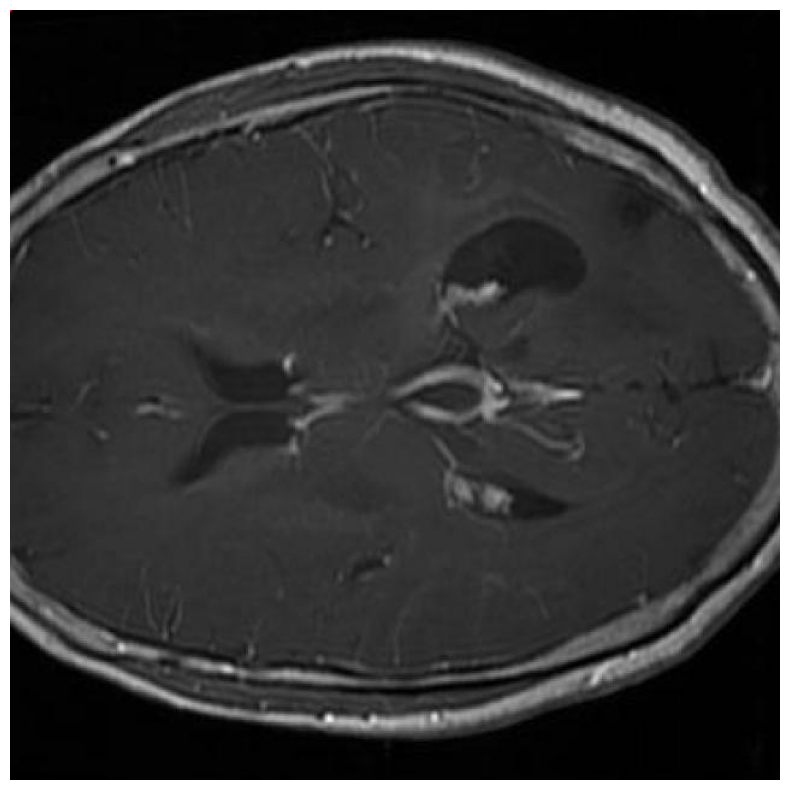

In [16]:
import numpy as np

# Example image and label file
image_filename = image_files[0]  # Use the first image in the list
label_filename = label_files[0]  # Use the corresponding label file

# Load the image
image_path = os.path.join(images_folder, image_filename)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

# Load the corresponding label file
label_path = os.path.join(labels_folder, label_filename)

# Read the bounding box details from the label file
with open(label_path, 'r') as file:
    label_data = file.readlines()

# Extract the class label and polygon coordinates
for line in label_data:
    parts = list(map(float, line.split()))
    class_label = int(parts[0])
    # Coordinates of the polygon (as x, y pairs)
    polygon_coords = np.array(parts[1:]).reshape(-1, 2)  # Reshape into (x, y) pairs

    # Draw the polygon on the image
    polygon_points = polygon_coords.astype(int)  # Convert to integer for pixel values
    image = cv2.polylines(image, [polygon_points], isClosed=True, color=(255, 0, 0), thickness=2)

# Display the image with the polygon bounding box
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()


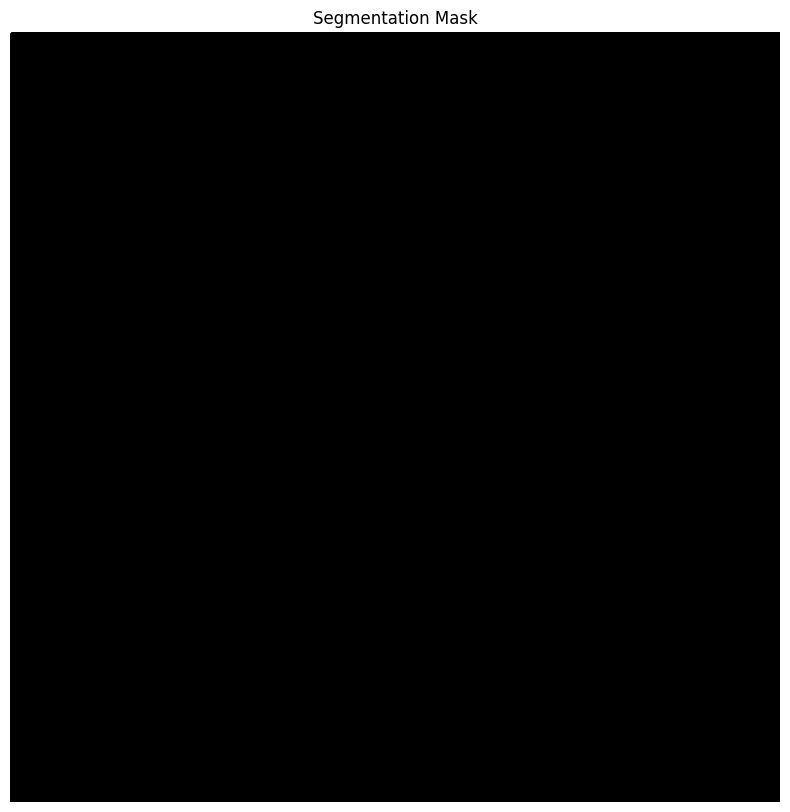

In [17]:
import numpy as np
import cv2
from tqdm import tqdm

# Function to create segmentation masks from polygon annotations
def create_segmentation_mask(image, label_data):
    # Create a blank mask with the same size as the image (all zeros)
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Iterate over each polygon in the label data and draw on the mask
    for line in label_data:
        parts = list(map(float, line.split()))
        class_label = int(parts[0])  # Class label (not used here but could be important later)
        polygon_coords = np.array(parts[1:]).reshape(-1, 2).astype(int)  # Convert to (x, y) pairs

        # Fill the polygon region with 1 (indicating tumor region)
        cv2.fillPoly(mask, [polygon_coords], color=1)

    return mask

# Example: Process the first image and its label to create the segmentation mask
image_filename = image_files[0]
label_filename = label_files[0]

# Load the image
image_path = os.path.join(images_folder, image_filename)
image = cv2.imread(image_path)

# Load the corresponding label file
label_path = os.path.join(labels_folder, label_filename)
with open(label_path, 'r') as file:
    label_data = file.readlines()

# Create segmentation mask
segmentation_mask = create_segmentation_mask(image, label_data)

# Display the segmentation mask
plt.figure(figsize=(10, 10))
plt.imshow(segmentation_mask, cmap='gray')
plt.axis('off')
plt.title("Segmentation Mask")
plt.show()


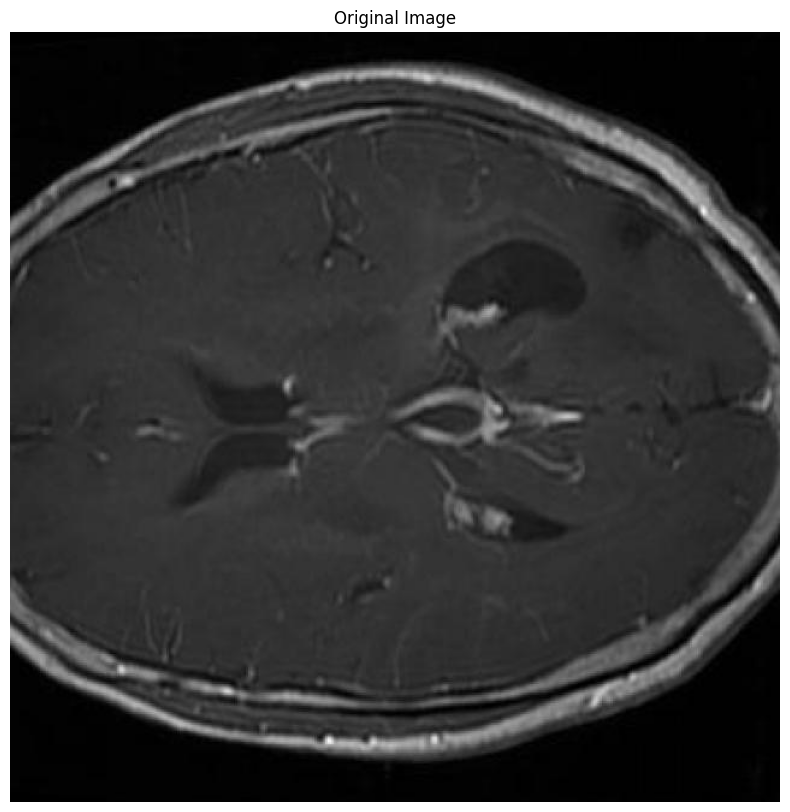

Label Data (polygon coordinates):
Class: 2, Polygon Coordinates: [[0.3091922  0.42061281]
 [0.28969359 0.46796657]
 [0.29247911 0.50417827]
 [0.33704735 0.55153203]
 [0.40947075 0.57103064]
 [0.44568245 0.55710306]
 [0.47075209 0.52924791]
 [0.47910863 0.44289694]
 [0.42896936 0.3816156 ]
 [0.37883008 0.37604457]
 [0.3091922  0.42061281]]


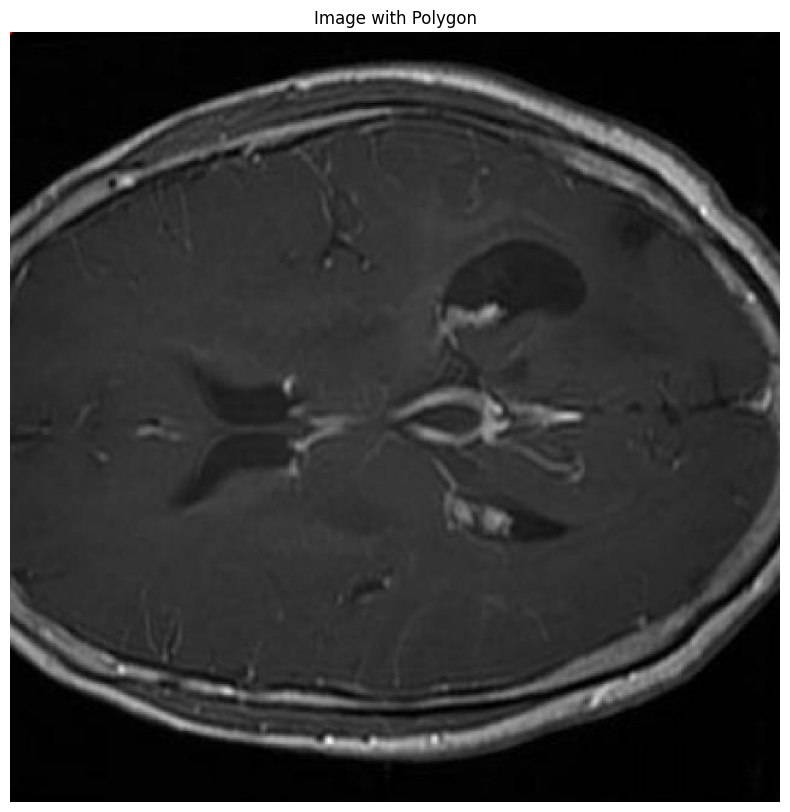

In [18]:
# Visualize the image and the polygon before drawing it on the mask
image_path = os.path.join(images_folder, image_filename)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the original image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.show()

# Check the label file to ensure polygon coordinates are correctly parsed
label_path = os.path.join(labels_folder, label_filename)
with open(label_path, 'r') as file:
    label_data = file.readlines()

# Print label data and polygon coordinates to verify
print("Label Data (polygon coordinates):")
for line in label_data:
    parts = list(map(float, line.split()))
    class_label = int(parts[0])
    polygon_coords = np.array(parts[1:]).reshape(-1, 2)
    print(f"Class: {class_label}, Polygon Coordinates: {polygon_coords}")

# Now let's draw the polygon on the original image for visualization
for line in label_data:
    parts = list(map(float, line.split()))
    polygon_coords = np.array(parts[1:]).reshape(-1, 2).astype(int)

    # Draw the polygon on the image
    image_with_polygon = image.copy()
    image_with_polygon = cv2.polylines(image_with_polygon, [polygon_coords], isClosed=True, color=(255, 0, 0), thickness=2)

# Display the image with polygon
plt.figure(figsize=(10, 10))
plt.imshow(image_with_polygon)
plt.axis('off')
plt.title("Image with Polygon")
plt.show()
